# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [4]:
# 检查数据维度
data.shape

(112915, 11)

In [5]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [6]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [7]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()
print(X.shape)
print(y.shape)

(108648, 10)
(108648,)


### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# 提示：查看train_test_split函数
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
%matplotlib inline

if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
# # 训练集和测试集的切分：
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=0) # random_state 随机切分的标记

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\3046461133.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样


SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64



<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

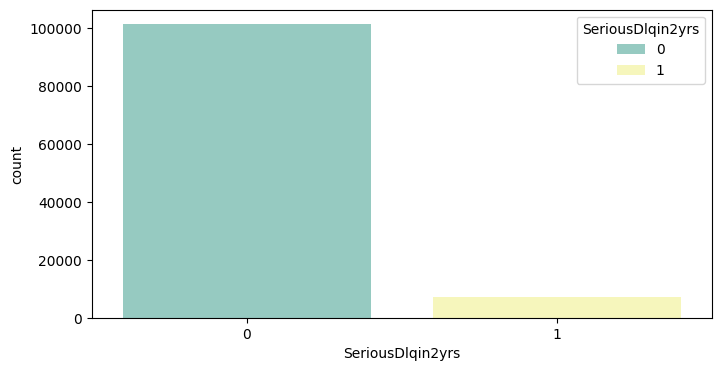

In [10]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print(y.value_counts())
print('')

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
plt.figure(figsize=(8,4))
sns.countplot(x="SeriousDlqin2yrs", data=data, hue="SeriousDlqin2yrs", palette="Set3", ) # 灰度柱状图

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

#### 2.数据预处理之离散化

In [11]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

# 1. 计算分桶边界
# 最小年龄
min_age = int(X['age'].min())
# 最大年龄
max_age = int(X['age'].max())

# 计算分桶边界，每个区间宽度为3岁
bin_edges = list(range(min_age, max_age + 4, 3))

# 2. 使用 cut 函数进行离散化
X['age_group'] = pd.cut(X['age'], bins=bin_edges, right=False)

#### 3.数据预处理之独热向量编码

In [38]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

# 使用 get_dummies 进行独热向量编码
encoded_age = pd.get_dummies(X['age_group'], prefix='age', dtype='float')
# type(encoded_age)
pd.get_dummies(X.drop('age', axis=1), prefix='age', dtype='float')
# # 在第一列插入新列
# encoded_age.insert(0, '', new_column)

# # 将独热向量编码后的结果与原始 DataFrame 合并
# X_encoded = pd.concat([X, encoded_age], axis=1)

# # 打印结果
# print(X_encoded)
# # X.columns.get_loc('age')

# # 对X_encoded扔掉‘age’列
# X_encoded2 = X_encoded.drop('age', axis=1)
# # 先对X_encoded2进行数据缩放
# X_encoded2

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_[0, 3)","age_[3, 6)","age_[6, 9)","age_[9, 12)","age_[12, 15)","age_[15, 18)","age_[18, 21)","age_[21, 24)","age_[24, 27)","age_[27, 30)","age_[30, 33)","age_[33, 36)","age_[36, 39)","age_[39, 42)","age_[42, 45)","age_[45, 48)","age_[48, 51)","age_[51, 54)","age_[54, 57)","age_[57, 60)","age_[60, 63)","age_[63, 66)","age_[66, 69)","age_[69, 72)","age_[72, 75)","age_[75, 78)","age_[78, 81)","age_[81, 84)","age_[84, 87)","age_[87, 90)","age_[90, 93)","age_[93, 96)","age_[96, 99)","age_[99, 102)","age_[102, 105)"
0,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0.385742,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112911,0.040674,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112912,0.299745,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112913,0.000000,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


在银行的风险评估或预测客户违约的场景中，将年龄进行分箱（分桶、离散化）有以下几个用途：

1. **降低模型复杂性：** 将连续的年龄特征分成若干个范围，可以降低模型对于细节的敏感性，使模型更加简单，减少过拟合的可能性。

2. **处理非线性关系：** 年龄与违约风险可能不是线性关系。分箱可以帮助模型更好地捕捉非线性关系，例如对于不同年龄段的客户可能存在不同的违约概率。

3. **增加模型解释性：** 将年龄分箱后，可以更直观地理解不同年龄段客户的违约风险。这有助于业务决策者更好地理解模型的输出。

4. **处理异常值：** 如果年龄包含异常值，分箱可以帮助将异常值归入相应的箱中，减少异常值对模型的影响。

总体而言，将年龄分箱是一种对于建模和业务解释都有帮助的数据预处理方式，可以提高模型的稳定性和可解释性。

机器学习里对数据进行离散化，热向量编码 之后再进行数据缩放和数据切分么？还是反过来？

通常的机器学习数据预处理流程是先进行数据缩放，然后再进行离散化和独热向量编码。这样的顺序有其合理性：

1. **数据缩放：** 在许多机器学习算法中，尤其是基于距离的算法（如支持向量机、K近邻等），特征的尺度对算法的性能有很大影响。因此，首先进行数据缩放，将特征的尺度调整到相对一致的范围内，有助于提高模型的稳定性和性能。

2. **离散化和独热向量编码：** 一旦数据的尺度被调整，可以对需要进行离散化的特征进行分箱操作。然后，对分箱后的结果进行独热向量编码，将离散特征转换为适用于机器学习算法的形式。

3. **数据切分：** 最后，将数据切分为训练集和测试集。这样做的目的是为了在建模过程中评估模型的性能，并验证模型对于未见过的数据的泛化能力。

虽然这是一个通用的流程，但实际上具体的情况可能因问题的性质而有所不同。在某些情况下，可能需要对特定步骤的顺序进行微调，以适应具体的数据和问题。

#### 4.数据预处理之幅度缩放

In [46]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_temp = X.drop(['age','age_group'], axis=1)
X_std = stdsc.fit_transform(X_temp)
# 将X_std转化成DataFrame的格式
# 将列指标和行指标添加到X_std上面
X_std_df = pd.DataFrame(X_std, columns=X_temp.columns)
X_std_df.index = X_temp.index

# 对数据进行合并
X_encoded_std = pd.concat([X_std_df, encoded_age], axis=1).astype(float)
X_encoded_std

# X_std_df
# # print(X_std.mean())  # 瞅一眼训练集的平均值
# # print(X_std.std())   # 瞅一眼训练集的方差

# 在 Pandas DataFrame 中，values 是一个属性（attribute）
# 而不是一个可写的属性。这意味着你不能直接使用赋值语句修改 values 属性。
# X_temp.values = stdsc.fit_transform(X_temp)
# encoded_age.astype(float)

# del X_encoded_std
# 把X_std和年龄分组合并一下
# X_encoded_std = pd.concat([pd.DataFrame(X_std).reset_index(drop=True), encoded_age.reset_index(drop=True)], axis=1)


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_[0, 3)","age_[3, 6)","age_[6, 9)","age_[9, 12)","age_[12, 15)","age_[15, 18)","age_[18, 21)","age_[21, 24)","age_[24, 27)","age_[27, 30)","age_[30, 33)","age_[33, 36)","age_[36, 39)","age_[39, 42)","age_[42, 45)","age_[45, 48)","age_[48, 51)","age_[51, 54)","age_[54, 57)","age_[57, 60)","age_[60, 63)","age_[63, 66)","age_[66, 69)","age_[69, 72)","age_[72, 75)","age_[75, 78)","age_[78, 81)","age_[81, 84)","age_[84, 87)","age_[87, 90)","age_[90, 93)","age_[93, 96)","age_[96, 99)","age_[99, 102)","age_[102, 105)"
0,-0.020107,0.459927,2.228325,0.144439,0.842602,-0.061113,4.625407,-0.054273,0.994689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.019371,-0.107406,-0.827015,-0.292437,-0.912435,-0.061113,-0.942146,-0.054273,0.124769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.020522,0.176260,-0.991928,-0.262821,-1.302443,0.225146,-0.942146,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.022156,-0.107406,-1.212020,-0.245533,-0.717431,-0.061113,-0.942146,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.019564,0.176260,-1.261921,3.794102,-0.327423,-0.061113,-0.014220,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,-0.021571,-0.107406,0.439864,-0.238833,-0.327423,-0.061113,-0.942146,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112911,-0.022899,-0.107406,-0.363830,-0.325940,-0.912435,-0.061113,-0.014220,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112912,-0.021902,-0.107406,1.840658,-0.092492,-0.912435,-0.061113,-0.014220,-0.054273,0.994689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112913,-0.023056,-0.107406,-1.373734,-0.083648,-0.912435,-0.061113,-0.942146,-0.054273,-0.745150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


在你的代码中，你使用 `pd.concat` 将 `pd.DataFrame(X_std)` 和 `encoded_age` 水平拼接（`axis=1`）。如果两个 DataFrame 的索引不同，拼接时可能会引入新的索引。新的索引将取决于拼接时的操作，可能会包含重复的行。

你可以尝试在拼接时重置索引，如下所示：

```python
X_encoded = pd.concat([pd.DataFrame(X_std).reset_index(drop=True), encoded_age.reset_index(drop=True)], axis=1)
```

在这里，`reset_index(drop=True)` 将重置索引并删除旧索引，确保两个 DataFrame 在拼接时使用默认的整数索引。这样可能会解决你的长度变化问题。

In [44]:
# 进行数据集切分
# 训练集和测试集的切分：
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_encoded_std, y, test_size=0.3, random_state=0) # random_state 随机切分的标记
print(X_train_std.shape)
print(X_test_std.shape)
# print(y_train_std.shape)
# print(y_test_std.shape)
# y_train_std.value_counts()
# y_test_std.value_counts()

(76053, 44)
(32595, 44)


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [53]:
# 重新把数据处理一下吧
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

# 导入包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 提示：查看train_test_split函数
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
%matplotlib inline

if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
# 训练集和测试集的切分：
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) # random_state 随机切分的标记

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.mean())  # 瞅一眼训练集的平均值
print(X_train_std.std())   # 瞅一眼训练集的方差
print(X_test_std.mean())  # 瞅一眼测试集的平均值
print(X_test_std.std())   # 瞅一眼测试集的方差

-4.295787804590142e-17
1.0
0.0005511241683895228
0.9522960818207552


C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\3849301064.py:20: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样


In [54]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
# 初始化模型！
# C 参数表示正则化强度的倒数，这里设定为一个非常大的值，相当于弱化正则化。
# random_state 参数是为了在每次运行时生成相同的随机数，以保证结果的可重复性。
# penalty 参数指定正则化类型，这里选择L2正则化。
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2', max_iter=1000) 
# 学习吧！
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)


Misclassified samples in test set: 2154
(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9339
Sloop: -0.01428302 -0.36429906  1.72892458  0.31210449 -0.11519959 -0.09188134
  1.68983565 -0.1964285  -3.24882741  0.11639198
Intercept: -2.859


C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\3077201718.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


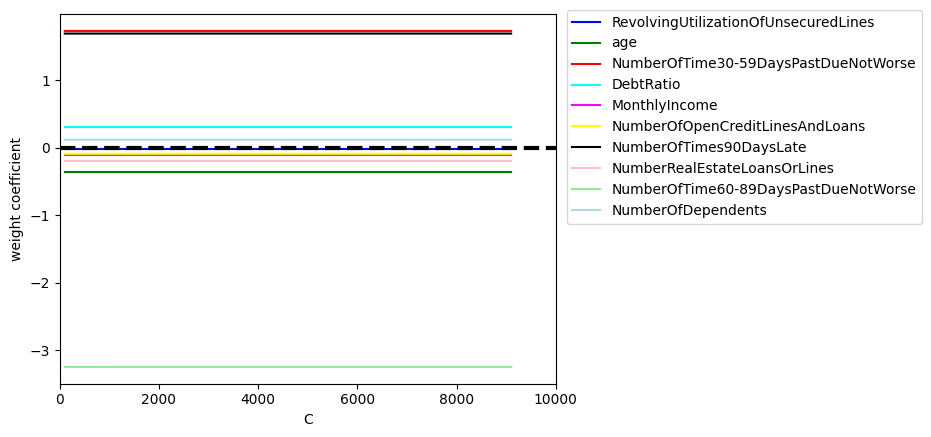

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
# 定义一组颜色，每个颜色对应一个特征的权重系数曲线
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []

# 循环尝试不同的正则化参数C的值
for c in np.arange(1, 100, 10):
    # 创建逻辑回归模型，指定L2正则化和不同的正则化强度C
    lr = LogisticRegression(penalty='l2', C=100.0 * c, random_state=0)
    # 使用训练数据拟合模型
    lr.fit(X_train_std, y_train)
    # 将权重和对应的C值添加到列表中
    weights.append(lr.coef_[0])
    params.append(100.0 * c)

# 将权重列表转换为NumPy数组
weights = np.array(weights)

# 遍历每个特征的权重数组，并绘制权重随C变化的曲线
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([0, 100*100])
plt.ylabel('weight coefficient')
plt.xlabel('C')
#plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

In [80]:
weight_C = pd.DataFrame(weights[5, :], index=X.columns, columns=['weight'] )
# 按照权重值降序排序
weight_C_sorted = weight_C.sort_values(by='weight', ascending=False)
weight_C_sorted 

,weight
NumberOfTime30-59DaysPastDueNotWorse,1.728922
NumberOfTimes90DaysLate,1.689830
DebtRatio,0.312105
NumberOfDependents,0.116392
RevolvingUtilizationOfUnsecuredLines,-0.014283
NumberOfOpenCreditLinesAndLoans,-0.091881
MonthlyIncome,-0.115200
NumberRealEstateLoansOrLines,-0.196429
age,-0.364299
NumberOfTime60-89DaysPastDueNotWorse,-3.248820


In [56]:
# 输出逻辑回归的系数和截距
lr.get_params()

{'C': 9100.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [82]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 准备参数字典
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

# 创建LogisticRegression模型
lr = LogisticRegression(solver='liblinear', random_state=0)

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# 使用训练数据进行网格搜索交叉验证
grid_search.fit(X_train_std, y_train)

# 输出最佳参数和对应的交叉验证得分
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# 获取最佳参数的模型
best_lr = grid_search.best_estimator_


Best parameters:  {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.9331


In [83]:
# 简单的网格搜索
# 导入需要的库
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 打印训练集和测试集的大小
print("Size of training set: %d   size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 初始化最佳得分为0
best_score = 0

# 'penalty': ['l1', 'l2'],
# 'C': [1, 10, 100, 500]
# 循环遍历一组预定义的超参数组合
for pen in ['l1', 'l2']:
    for C in [1, 10, 100, 500]:
        # 对于每一组参数组合

        # 创建LogisticRegression模型
        lr = LogisticRegression(penalty=pen, C=C, solver='liblinear', random_state=0)

        # # 创建GridSearchCV对象
        # grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

        # 使用训练数据进行网格搜索交叉验证
        lr.fit(X_train_std, y_train)
        
        # 在测试集上评估lr的性能
        score = lr.score(X_test_std, y_test)
        
        # 如果得分更好，保存得分和参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': pen}
            
# 打印最佳得分和对应的最佳参数
print("best score: ", best_score)
print("best parameters: ", best_parameters)


Size of training set: 81486   size of test set: 27162
best score:  0.9350195125543038
best parameters:  {'C': 1, 'penalty': 'l1'}


In [84]:
# 输出最好的超参数
# 输出最好的模型
# 打印最佳得分和对应的最佳参数
print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.9350195125543038
best parameters:  {'C': 1, 'penalty': 'l1'}


In [87]:
# 数据集划分：将原始数据集分为训练+验证集和测试集。
# 训练+验证集划分：将训练+验证集划分为训练集和验证集。
# 网格搜索：使用嵌套的循环遍历一组预定义的超参数组合，通过在验证集上评估性能找到最佳的超参数组合。
# 最终模型训练和测试：使用最佳的超参数组合在训练+验证集上训练最终模型，并在测试集上评估模型性能。

# 导入需要的库
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X)
X_std = sc.transform(X)

# 划分数据集为训练+验证集和测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X_std, y, random_state=0)

# 再次将训练+验证集划分为训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

# 打印训练集、验证集和测试集的大小
print("Size of training set: %d   size of validation set: %d   size of test set: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

# 初始化最佳得分为0
best_score = 0

# 遍历一组预定义的超参数组合
for pen in ['l1', 'l2']:
    for C in [1, 10, 100, 500]:
        # 对于每一组参数组合
        # 创建LogisticRegression模型
        lr = LogisticRegression(penalty=pen, C=C, solver='liblinear', random_state=0)

        # # 创建GridSearchCV对象
        # grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

        # 使用训练数据进行网格搜索交叉验证
        lr.fit(X_train, y_train)
        
        # 在测试集上评估lr的性能
        score = lr.score(X_valid, y_valid)
        
        # 如果得分更好，保存得分和参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': pen}

# 使用最佳参数再次在训练+验证集上训练模型，并在测试集上评估性能
lr = LogisticRegression(**best_parameters, solver='liblinear')
lr.fit(X_trainval, y_trainval)
test_score = lr.score(X_test, y_test)

# 打印最佳得分、最佳参数以及在测试集上的性能
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)


Size of training set: 61114   size of validation set: 20372   size of test set: 27162
best score on validation set:  0.9316709208717848
best parameters:  {'C': 10, 'penalty': 'l1'}
test set score with best parameters:  0.9350195125543038


In [90]:
# 使用最佳参数在训练+验证集上重新构建一个LogisticRegression模型
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
# 通过乱序分割交叉验证效果要比5折的交叉验证好
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
# 初始化最佳得分为0
best_score = 0

# 遍历一组预定义的超参数组合
for pen in ['l1', 'l2']:
    for C in [1, 10, 100, 500]:
        # 创建LogisticRegression模型
        lr = LogisticRegression(penalty=pen, C=C, solver='liblinear', random_state=0)

        # # 使用训练数据进行网格搜索交叉验证
        # lr.fit(X_train, y_train)

        # 执行5折交叉验证，返回每一折的得分
        scores = cross_val_score(lr, X_trainval, y_trainval, cv=shuffle_split)
        
        # 计算平均交叉验证准确度
        score = np.mean(scores)
        
        # 如果得分更好，保存得分和参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': pen}

# 使用最佳参数再次在训练+验证集上训练模型，并在测试集上评估性能
lr = LogisticRegression(**best_parameters, solver='liblinear')
lr.fit(X_trainval, y_trainval)
test_score = lr.score(X_test, y_test)

# 打印最佳得分、最佳参数以及在测试集上的性能
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)

best score on validation set:  0.9329651719313748
best parameters:  {'C': 500, 'penalty': 'l1'}
test set score with best parameters:  0.9350195125543038


##### 下面是没有用的东西

比如说绘制热力图之类的，针对网格搜索交叉验证进行调参

In [91]:
param_grid = {'C': [1, 10, 100, 500],
              'penalty': ['l1', 'l2']}
param_grid

{'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']}

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_search = GridSearchCV (LogisticRegression(solver='liblinear', random_state=0), param_grid, cv=5)

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X)
X_std = sc.transform(X)

# 划分数据集为训练+验证集和测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X_std, y, random_state=0)

# 再次将训练+验证集划分为训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [97]:
grid_search.score(X_test, y_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

{'C': 10, 'penalty': 'l1'}
0.9331577078780888


LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear')

下面这段代码主要实现了对网格搜索交叉验证的结果进行可视化，展示了每组超参数的交叉验证准确度、平均准确度以及最佳参数组合的准确度。以下是主要步骤：

1. **设置图形参数：** 设置图形的大小、横纵坐标范围等。
2. **绘制交叉验证得分：** 对每一折的测试集得分进行绘制，使用灰色的三角形标记。
3. **绘制平均准确度：** 绘制黑色的横线标记，表示每组超参数组合的平均测试集准确度。
4. **绘制最佳参数准确度：** 找到排名第一的参数组合，并绘制红色的圆圈标记表示该组合对应的测试集准确度。
5. **设置横坐标刻度：** 使用参数组合的字符串形式，并进行一些格式处理，以使其更易读。
6. **设置图形标签和图例：** 设置横纵坐标的标签，以及图例说明。
7. **显示图形：** 使用 `plt.show()` 显示图形。

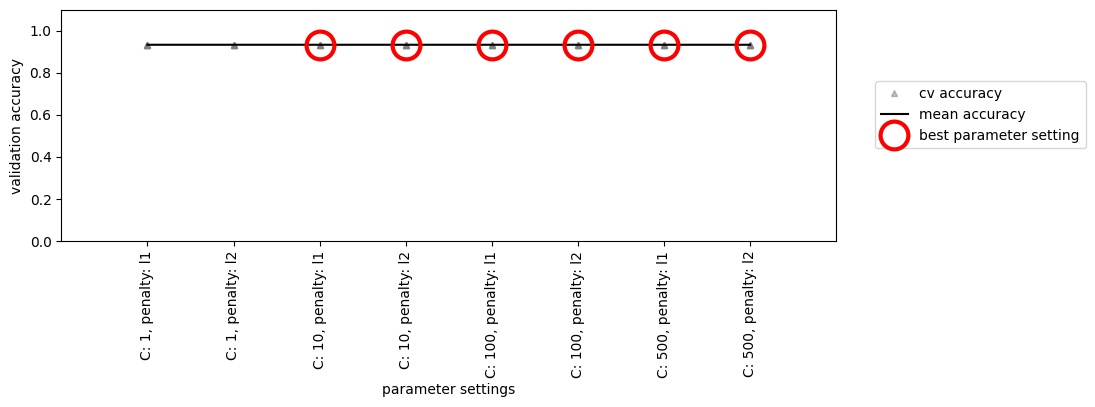

In [98]:
# 获取网格搜索的交叉验证结果
scores = grid_search.cv_results_
cv = 5  # 交叉验证的折数
length = len(scores['rank_test_score'])

# 创建一个图形，并设置横坐标和纵坐标的范围
plt.figure(figsize=(10, 3))
plt.xlim(-1, length)
plt.ylim(0, 1.1)

# 遍历每一折的测试集得分，绘制灰色的三角形标记
for i in range(cv):
    marker_cv = plt.plot(scores[f'split{i}_test_score'], '^', c='gray', markersize=5, alpha=.5)

# 找到排名第一的参数组合
slic = scores['rank_test_score'] == 1

# 绘制黑色的横线标记表示平均测试集得分
marker_mean = plt.plot(scores['mean_test_score'], '-', c='k', alpha=1, markersize=10)

# 绘制红色的圆圈标记表示最佳参数组合对应的测试集得分
marker_best = plt.plot(np.arange(length)[slic], scores['mean_test_score'][slic], 'o', c='red', fillstyle="none", alpha=1, markersize=20, markeredgewidth=3)

# 设置横坐标刻度，使用参数组合的字符串形式，并进行一些格式处理
plt.xticks(range(length), [str(param).strip("{}").replace("'", "") for param in scores['params']], rotation=90)

# 设置图形的标签和图例
plt.ylabel("validation accuracy")
plt.xlabel("parameter settings")
plt.legend([marker_cv[0], marker_mean[0], marker_best[0]], ["cv accuracy", "mean accuracy", "best parameter setting"], loc=(1.05, .4))

# 显示图形
plt.show()


In [99]:
scores = grid_search.cv_results_
scores

{'mean_fit_time': array([0.58939915, 0.06669559, 0.64508719, 0.05417676, 0.606881  ,
        0.05925612, 0.67451563, 0.069625  ]),
 'std_fit_time': array([0.06323131, 0.00972756, 0.05216591, 0.00432046, 0.06469982,
        0.00599676, 0.10692485, 0.00234024]),
 'mean_score_time': array([0.0005969 , 0.00102048, 0.00128851, 0.00636568, 0.00062556,
        0.00185685, 0.00058408, 0.00194201]),
 'std_score_time': array([0.00049931, 0.00091808, 0.00122605, 0.00588544, 0.00125113,
        0.0004447 , 0.00076784, 0.00033329]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 500, 500],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'penalty': 'l1'},
  {'C': 1, 'penalty': 'l2

In [110]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.4f"):
    """
    绘制热力图

    参数：
    - values: 二维数组，表示要绘制的数据
    - xlabel: 横坐标的标签
    - ylabel: 纵坐标的标签
    - xticklabels: 横坐标刻度的标签
    - yticklabels: 纵坐标刻度的标签
    - cmap: colormap，用于设置颜色映射
    - vmin: 颜色映射的最小值
    - vmax: 颜色映射的最大值
    - ax: matplotlib.axes.AxesSubplot 对象，用于绘制图形的坐标轴
    - fmt: 标签的格式化字符串，默认为 "%.4f"

    返回：
    - img: matplotlib.image.AxesImage 对象，表示绘制的图像
    """
    if ax is None:
        ax = plt.gca()

    # 绘制均值交叉验证分数的图像
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()

    # 设置横纵坐标标签
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # 设置横纵坐标刻度
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # 保持纵横坐标刻度相等
    ax.set_aspect(1)

    # 在每个小格中心添加文本标签
    for y, value in zip(range(len(yticklabels)), img.get_array()):
        for x in range(len(xticklabels)):
            ax.text(x + 0.5, y + 0.5, fmt % value[x], color='k' if value[x] > 0.9 else 'w',
                    ha="center", va="center")

    return img


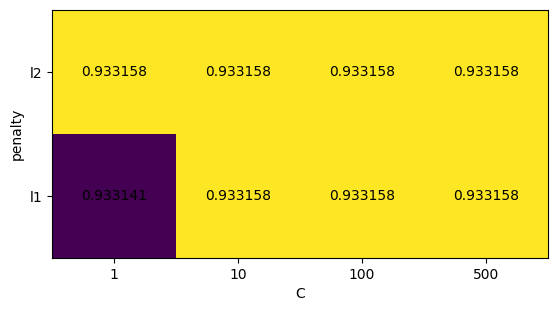

In [113]:
mean_scores = scores['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(param_grid['penalty']), len(param_grid['C']))
# reshape(len(param_grid['penalty']), len(param_grid['C']))

# plot the mean cross-validation scores
heatmap(mean_scores, xlabel='C', ylabel='penalty', xticklabels=param_grid['C'],
                      yticklabels=param_grid['penalty'], cmap="viridis", fmt="%0.6f")

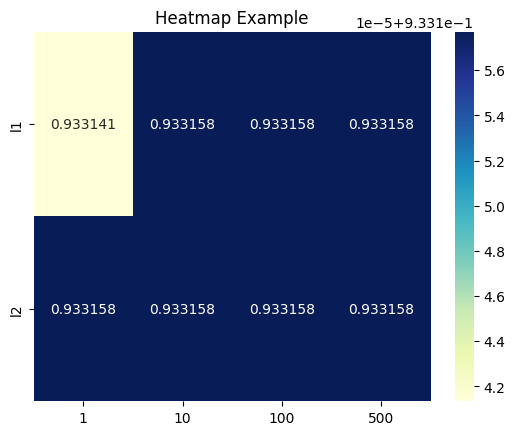

In [119]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# param_grid = {'C': [1, 10, 100, 500],
#               'penalty': ['l1', 'l2']}
# len(param_grid['penalty'])
# len(param_grid['C'])
data = pd.DataFrame(mean_scores, index=['l1', 'l2'] ,columns=['1', '10', '100', '500'])
sns.heatmap(data, cmap='YlGnBu', annot=True, fmt="0.6f")
plt.title('Heatmap Example') # 设置图形标题
plt.show()

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [125]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 准备参数字典
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

# 创建LogisticRegression模型
lr = LogisticRegression(solver='liblinear', random_state=0)

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# 使用训练数据进行网格搜索交叉验证
grid_search.fit(X_train_std, y_train)

# 输出最佳参数和对应的交叉验证得分
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# 获取最佳参数的模型
best_lr = grid_search.best_estimator_

Best parameters:  {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.9331


In [142]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
import sklearn
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 假设模型是已经训练好的 lr 模型
# lr.fit(X_train_std, y_train)
lr = best_lr

# 在测试集上进行预测
y_test_pred = lr.predict(X_test_std)

# 计算各种评估指标
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test_std)[:, 1])  # 需要模型有predict_proba方法
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 输出各个评估指标的值
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9339
Recall: 0.0415
ROC AUC: 0.6982
Confusion Matrix:
[[30349    75]
 [ 2081    90]]
F1 Score: 0.0771


**3. 基于混淆矩阵的评估度量**

**准确率、识别率（Classification Accuracy）**：分类器正确分类的比例

**错误率、误分类率（Classification Error）**：分类器误分类的比例

**灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）**：正确识别的正例数据在实际正例数据中的百分比

考虑类不平衡问题，其中感兴趣的主类是稀少的。即数据集的分布反映负类显著地占多数，而正类占少数。故面对这种问题，需要其他的度量，评估分类器正确地识别正例数据的情况和正确地识别负例数据的情况。


**特效性（Specificity），也称为真负例率**：正确识别的负例数据在实际负例数据中的百分比

**假阳率（False Positive Rate）**：实际值是负例数据，预测错误的百分比

**精度（Precision）**：看做精确性的度量，即标记为正类的数据实际为正例的百分比

**F度量（又称为F1分数或F分数）**，是使用精度和召回率的方法组合到一个度量上


F=2∗precision∗recallprecision+recall  


Fβ=(1+β2)∗precision∗recallβ2∗precision+recall


F度量是精度和召回率的调和均值，它赋予精度和召回率相等的权重。
Fβ度量是精度和召回率的加权度量，它赋予召回率权重是赋予精度的β倍。

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [ ]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[[0.93562084 0.06437916]
 [0.79148042 0.20851958]
 [0.96490329 0.03509671]
 [0.9414277  0.0585723 ]
 [0.87564853 0.12435147]
 [0.98540422 0.01459578]
 [0.94533248 0.05466752]
 [0.96499331 0.03500669]
 [0.95256001 0.04743999]
 [0.95361482 0.04638518]]
[0.06437916 0.20851958 0.03509671 0.0585723  0.12435147 0.01459578
 0.05466752 0.03500669 0.04743999 0.04638518]


Text(0, 0.5, 'Frequency')

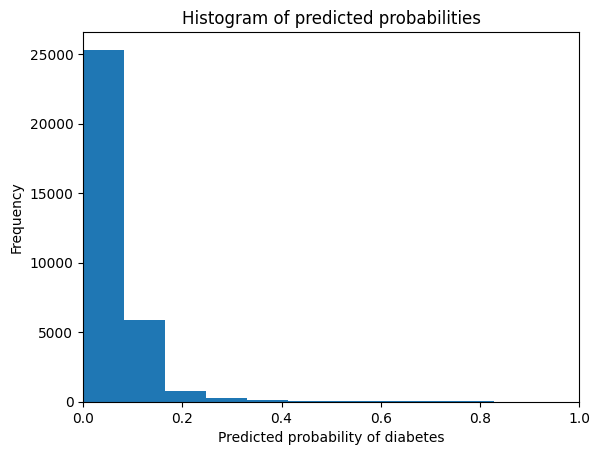

In [135]:
# print 10 predicted responses
print(lr.predict(X_test_std)[60:70])
print(y_test.values[60:70])
print(lr.predict_proba(X_test_std)[60:70, :])
print(lr.predict_proba(X_test_std)[60:70, 1])

y_pred_prob = lr.predict_proba(X_test_std)[:, 1]

%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [143]:
# predict diabetes if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.2)[:,0]

# print the 10 predicted probabilities
print(y_pred_prob[60:70])
print(y_pred_class)
print(y_pred_class[60:70])
print(y_test.values[60:70])
print(conf_matrix )

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[0.06437916 0.20851958 0.03509671 0.0585723  0.12435147 0.01459578
 0.05466752 0.03500669 0.04743999 0.04638518]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 1 0 0 0 0 0 0 0 0]
[[30349    75]
 [ 2081    90]]
[[29854   570]
 [ 1774   397]]


In [146]:
print(397 / float(1774 + 397))
# print(metrics.recall_score(y_test, y_pred_class))
# 灵敏度提高了！
print(29854 / float(29854 + 570))

0.1828650391524643
0.9812647909545096


**ROC曲线 (Receiver Operating Characteristic Curve):**

ROC曲线是用于评估二分类模型性能的一种工具。它以假正例率（False Positive Rate，FPR）为横坐标，真正例率（True Positive Rate，TPR，也称为召回率）为纵坐标，通过调整分类模型的阈值来绘制。ROC曲线的横坐标是FPR，表示被错误地分类为正例的负例样本的比例；纵坐标是TPR，表示被正确地分类为正例的正例样本的比例。曲线下的面积越大，模型性能越好。



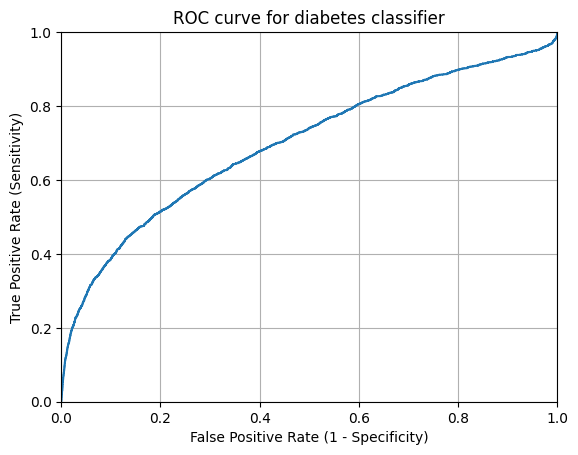

In [147]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [149]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)
evaluate_threshold(0.3)

Sensitivity: 0.041455550437586364
Specificity: 0.9975348409150671
Sensitivity: 0.10548134500230309
Specificity: 0.9928017354719958


**AUC (Area Under the Curve):**

AUC是ROC曲线下的面积，表示模型能够正确分类正例和负例的能力。AUC的取值范围在0到1之间，值越大表示模型性能越好。一个完美的分类器的AUC为1，而随机猜测的AUC为0.5。

AUC的解释可以这样理解：在一个随机选择的正例和负例样本中，模型预测正例的概率高于负例的概率的比例。AUC越高，说明正例的排名高于负例的概率越高，模型的性能越好。

在实际应用中，AUC常用于比较不同模型的性能，尤其在样本不平衡的情况下，AUC更能反映模型的稳定性和鲁棒性。

In [153]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6981964740193352


这段代码使用了scikit-learn库中的`roc_auc_score`和`cross_val_score`函数，用于计算ROC曲线下的面积（AUC）。

**注释：**
- `roc_auc_score`用于计算ROC曲线下的面积（AUC）。
- `y_test`是测试集上的真实标签，表示样本的真实分类情况。
- `y_pred_prob`是模型在测试集上预测的概率值，表示样本被分类为正例的概率。
- 该函数计算并打印出测试集上的AUC值，用来评估模型在二分类问题中的性能。AUC的值越接近1，模型性能越好。


In [152]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring='roc_auc').mean()

0.7033197343755067


**注释：**
- `cross_val_score`用于进行交叉验证，评估模型在不同子集上的性能。
- `lr`是已经训练好的Logistic回归模型。
- `X`和`y`是特征和标签。
- `cv=10`表示使用10折交叉验证。
- `scoring='roc_auc'`表示使用ROC曲线下的面积作为评估指标。
- `mean()`计算交叉验证结果的平均值，以提供一个更稳定的性能度量。

这段代码的目的是计算并打印出模型在测试集上的AUC值，以及进行10折交叉验证并计算平均的AUC值，从而更全面地评估模型在不同数据集上的性能。

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [ ]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

LogisticRegression

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\3780250039.py:15: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样
C:\Users\Ultimator\AppData\Local\Temp\ipykernel_9844\3780250039.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


Misclassified samples in test set: 2154
(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9339
Sloop: -0.01351578 -0.36472085  1.7049638   0.31229055 -0.10923971 -0.09184792
  1.66662743 -0.19737385 -3.20260811  0.11614236
Intercept: -2.860


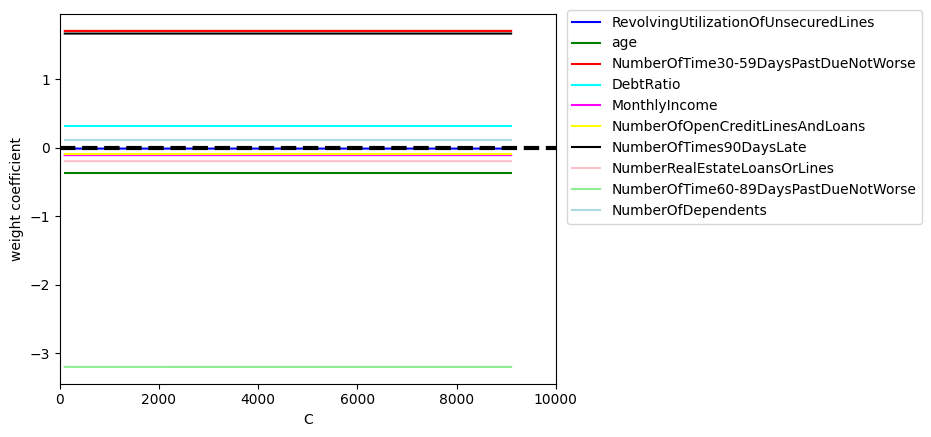

In [123]:
# 导入包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 提示：查看train_test_split函数
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
%matplotlib inline

if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X)
X_std = sc.transform(X)
# 训练集和测试集的切分：
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0) # random_state 随机切分的标记

from sklearn.linear_model import LogisticRegression
# 初始化模型！
# C 参数表示正则化强度的倒数，这里设定为一个非常大的值，相当于弱化正则化。
# random_state 参数是为了在每次运行时生成相同的随机数，以保证结果的可重复性。
# penalty 参数指定正则化类型，这里选择L2正则化。
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2', max_iter=1000) 
# 学习吧！
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
# 定义一组颜色，每个颜色对应一个特征的权重系数曲线
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []

# 循环尝试不同的正则化参数C的值
for c in np.arange(1, 100, 10):
    # 创建逻辑回归模型，指定L2正则化和不同的正则化强度C
    lr = LogisticRegression(penalty='l2', C=100.0 * c, random_state=0)
    # 使用训练数据拟合模型
    lr.fit(X_train_std, y_train)
    # 将权重和对应的C值添加到列表中
    weights.append(lr.coef_[0])
    params.append(100.0 * c)

# 将权重列表转换为NumPy数组
weights = np.array(weights)

# 遍历每个特征的权重数组，并绘制权重随C变化的曲线
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([0, 100*100])
plt.ylabel('weight coefficient')
plt.xlabel('C')
#plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()


In [121]:
weight_C = pd.DataFrame(weights[5, :], index=X.columns, columns=['weight'] )
# 按照权重值降序排序
weight_C_sorted = weight_C.sort_values(by='weight', ascending=False)
weight_C_sorted 

,weight
NumberOfTime30-59DaysPastDueNotWorse,1.728922
NumberOfTimes90DaysLate,1.689830
DebtRatio,0.312105
NumberOfDependents,0.116392
RevolvingUtilizationOfUnsecuredLines,-0.014283
NumberOfOpenCreditLinesAndLoans,-0.091881
MonthlyIncome,-0.115200
NumberRealEstateLoansOrLines,-0.196429
age,-0.364299
NumberOfTime60-89DaysPastDueNotWorse,-3.248820


随机树对特征重要性排序

In [155]:
# 导入RandomForestClassifier类
from sklearn.ensemble import RandomForestClassifier

# 获取特征标签（假设X是包含了特征和标签的数据集）
feat_labels = X.columns[:]

# 初始化RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10000,  # 森林中树的数量
                                random_state=0,      # 随机种子，确保结果的可重复性
                                n_jobs=-1)           # 指定并行处理的CPU核数，-1表示使用所有可用的核

forest.fit(X_train_std, y_train)


RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [171]:
feat_labels = X.columns[:]
print(importances)
print(np.argsort(importances)[::-1])
print(np.argsort(importances))
print(X_train_std.shape[1])
feat_labels

[0.1874228  0.12261244 0.05140059 0.17353095 0.1655425  0.08945927
 0.08807213 0.03205556 0.04389929 0.04600446]
[0 3 4 1 5 6 2 9 8 7]
[7 8 9 2 6 5 1 4 3 0]
10


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

 1) RevolvingUtilizationOfUnsecuredLines               0.187423
 2) DebtRatio                                          0.173531
 3) MonthlyIncome                                      0.165543
 4) age                                                0.122612
 5) NumberOfOpenCreditLinesAndLoans                    0.089459
 6) NumberOfTimes90DaysLate                            0.088072
 7) NumberOfTime30-59DaysPastDueNotWorse               0.051401
 8) NumberOfDependents                                 0.046004
 9) NumberOfTime60-89DaysPastDueNotWorse               0.043899
10) NumberRealEstateLoansOrLines                       0.032056


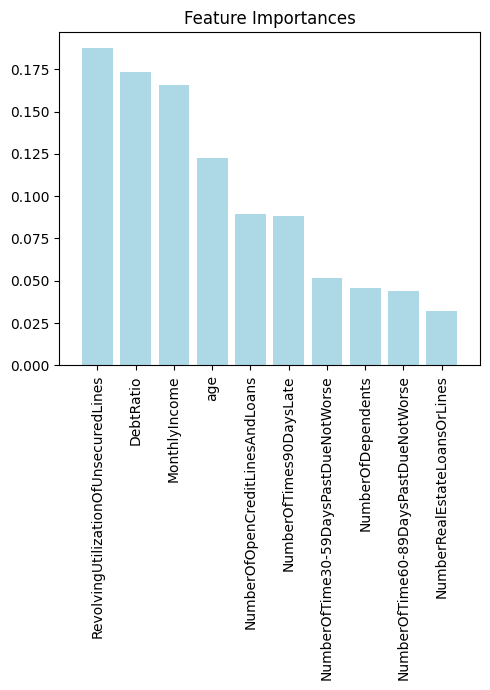

In [170]:
# 获取特征的重要性
importances = forest.feature_importances_

# 对特征重要性进行降序排列，返回排序后的索引
indices = np.argsort(importances)[::-1]

# 打印每个特征的重要性
for f in range(X_train_std.shape[1]):
        print("%2d) %-*s %f" % (f + 1 , 50, 
                                feat_labels[indices[f]],  # 根据索引找到对应名字
                                importances[indices[f]]))

# 绘制特征重要性的条形图
plt.figure(figsize=(5, 7))
plt.title('Feature Importances')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

# 设置横坐标刻度和标签
plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
# 保存图像文件（可选）
# plt.savefig('./random_forest.png', dpi=300)
# 显示图形
plt.show()

注释：

importances = forest.feature_importances_: 获取训练好的随机森林分类器中各个特征的重要性。

indices = np.argsort(importances)[::-1]: 对特征重要性进行降序排列，返回排序后的特征索引。

通过循环，打印每个特征的重要性排名和重要性值。
使用Matplotlib绘制条形图，展示每个特征的重要性。横坐标表示特征，纵坐标表示重要性。颜色为浅蓝色。

设置横坐标刻度和标签，并限定横坐标范围。

plt.tight_layout(): 调整图形布局，确保图形紧凑。
可选步骤：保存图像文件（将图形保存为PNG格式的文件，dpi为300）。

plt.show(): 显示图形。

**子特征集选择法**

In [177]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# 顺序后退选择（Sequential Backward Selection，SBS）算法
class SBS():
    def __init__(self, estimator, k_features, scoring=recall_score,
                 test_size=0.25, random_state=1):
        # scoring=accuracy_score
        # 初始化SBS对象
        self.scoring = scoring  # 评估指标，默认为准确度
        self.estimator = clone(estimator)  # 使用深度复制克隆传入的分类器或回归器
        self.k_features = k_features  # 希望保留的最终特征数量
        self.test_size = test_size  # 测试集大小的比例，默认为0.25
        self.random_state = random_state  # 随机种子，默认为1

    def fit(self, X, y):
        # 训练SBS模型
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]  # 特征数量
        self.indices_ = tuple(range(dim))  # 初始化特征索引的元组
        self.subsets_ = [self.indices_]  # 初始化特征子集的列表
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]  # 存储每个阶段的评估指标分数

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                # 通过组合生成新的特征子集
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)  # 选择具有最大分数的特征子集
            self.indices_ = subsets[best]  # 更新特征索引
            self.subsets_.append(self.indices_)  # 添加到特征子集列表
            dim -= 1

            self.scores_.append(scores[best])  # 记录选择的特征子集的分数
        self.k_score_ = self.scores_[-1]  # 记录最终选择的特征子集的分数

        return self

    def transform(self, X):
        # 返回选择特征子集后的数据
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 计算模型在给定特征子集下的评估指标分数
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


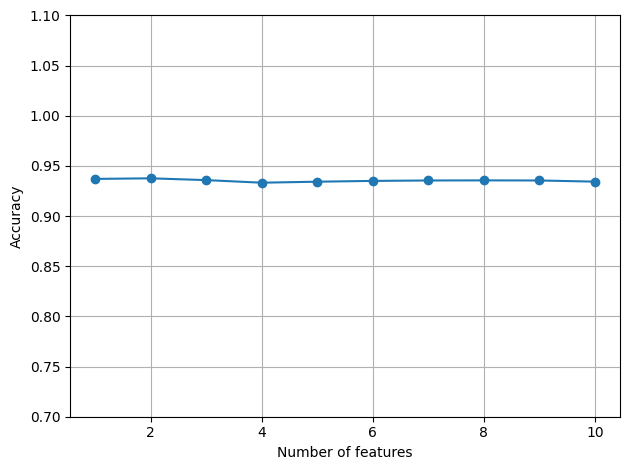

In [175]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 创建K最近邻分类器
knn = KNeighborsClassifier(n_neighbors=2)

# 使用SBS算法选择最佳特征子集
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train) # scoring=accuracy_score

# 获取每个特征子集的特征数量和准确度分数
k_feat = [len(k) for k in sbs.subsets_]
scores = sbs.scores_

# 绘制特征数量与准确度之间的关系图
plt.plot(k_feat, scores, marker='o')
plt.ylim([0.7, 1.1])  # 设置y轴范围
plt.ylabel('Accuracy')  # 设置y轴标签
plt.xlabel('Number of features')  # 设置x轴标签
plt.grid()  # 显示网格线
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形


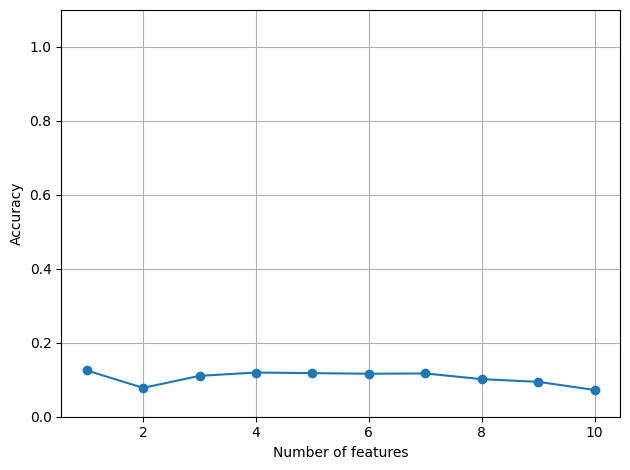

In [179]:
# import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsClassifier
# import sklearn

# # 创建K最近邻分类器
# knn = KNeighborsClassifier(n_neighbors=2)

# # 使用SBS算法选择最佳特征子集
# sbs = SBS(knn, k_features=1)
# sbs.fit(X_train_std, y_train)

# # 获取每个特征子集的特征数量和准确度分数
# k_feat = [len(k) for k in sbs.subsets_]
# scores = sbs.scores_

# 绘制特征数量与准确度之间的关系图
plt.plot(k_feat, scores, marker='o')
plt.ylim([0.0, 1.1])  # 设置y轴范围
plt.ylabel('Accuracy')  # 设置y轴标签
plt.xlabel('Number of features')  # 设置x轴标签
plt.grid()  # 显示网格线
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier


# 创建随机森林分类器
forest = RandomForestClassifier()

# 定义参数网格
param_grid = {
    # 'n_estimators': [10, 25, 50, 100, 150],
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}

# 定义评分函数为 F1 分数
scoring = {'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score)}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring=scoring, refit='recall', cv=5)

# 运行网格搜索
grid_search.fit(X_train_std, y_train)

# 输出最佳参数组合和相应的分数
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
print("Accuracy on test set: ", accuracy_score(y_test, grid_search.predict(X_test_std)))
print("Recall on test set: ", recall_score(y_test, grid_search.predict(X_test_std)))


Best parameters:  {'max_depth': 20, 'n_estimators': 50}
Best F1 score:  0.16741028128031038
Accuracy on test set:  0.9341616812394539
Recall on test set:  0.16720405343159833


In [ ]:
# from sklearn.pipeline import Pipeline
# pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

# sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
# sc.fit(X)
# X_std = sc.transform(X)
# # 训练集和测试集的切分：
# X_train_std, X_test_std, y_train, y_test = train_test_split(
#     X_std, y, test_size=0.3, random_state=0) # random_state 随机切分的标记